In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re

from textblob import TextBlob
from scipy. stats import pearsonr

In [42]:
news_dataset = pd.read_csv('without_stemming_polarity_subjectivity.csv')

In [43]:
news_dataset

,subject,date,news,output,polarity,subjectivity
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0,0.083136,0.597204
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0,-0.020811,0.344802
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0,-0.012345,0.541969
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0,-0.038021,0.413021
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0,-0.011722,0.495222
...,...,...,...,...,...,...
44883,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1,0.216515,0.448106
44884,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1,0.020000,0.070000
44885,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1,0.056011,0.414944
44886,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1,0.021993,0.377753


In [48]:
news_dataset = news_dataset.loc[abs(news_dataset['polarity']) > 0.6]

In [49]:
news_dataset

,subject,date,news,output,polarity,subjectivity
11017,politics,2017-04-29,BRAVE PRO-TRUMP REPORTER Grabs Microphone At C...,0,0.700000,0.875000
11248,politics,2017-03-30,ROB SCHNEIDER Nails The Russia Conspiracy Theo...,0,-1.000000,1.000000
11283,politics,2017-03-27,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,0,-0.700000,0.666667
11288,politics,2017-03-26,THE HORRIBLE END GAME: BERNIE SANDERS Calls fo...,0,-0.700000,0.700000
11303,politics,2017-03-25,OUTRAGEOUS! NANCY PELOSI Claims Obamacare Hono...,0,-1.000000,1.000000
...,...,...,...,...,...,...
31197,politicsNews,2016-10-23,Trump will accept election results if it's fai...,1,0.700000,0.900000
31621,politicsNews,2016-09-14,Hackers are targeting state Democratic Party o...,1,0.937500,0.950000
42438,worldnews,2017-09-26,U.S. welcomes royal order to allow Saudi women...,1,0.628571,0.728571
42644,worldnews,2017-09-24,"Turkish, Iranian presidents discuss Iraqi Kurd...",1,0.800000,0.750000


c:\users\10\appdata\local\programs\python\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


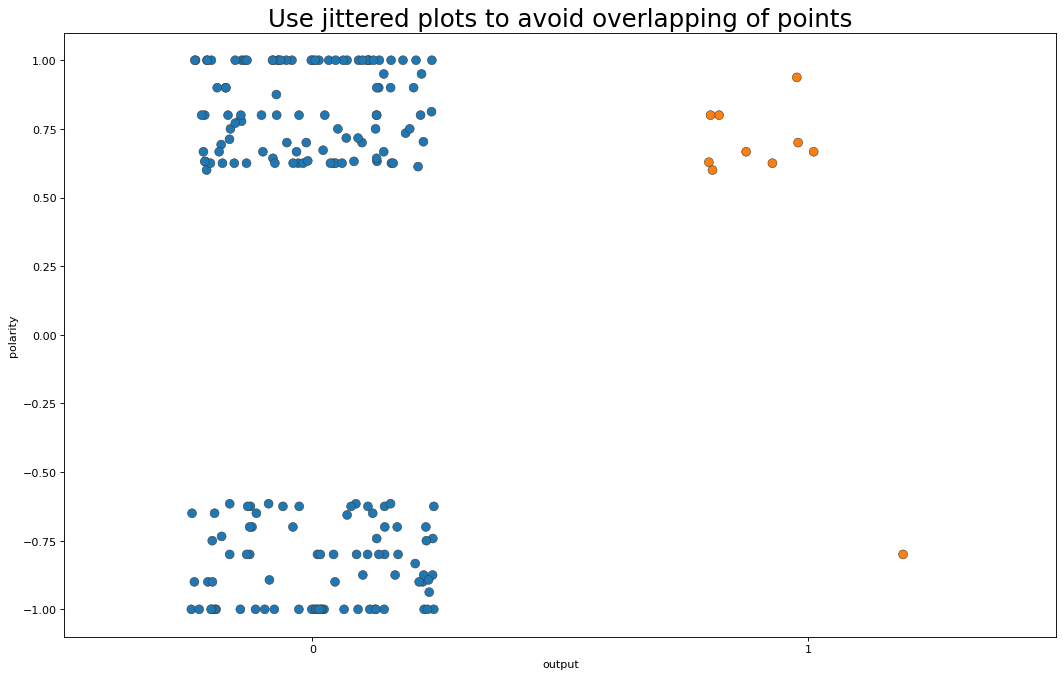

In [51]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(news_dataset['output'], news_dataset['polarity'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

In [58]:
news_dataset = pd.read_csv('without_stemming_polarity_subjectivity.csv')

In [59]:
news_dataset

,subject,date,news,output,polarity,subjectivity
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0,0.083136,0.597204
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0,-0.020811,0.344802
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0,-0.012345,0.541969
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0,-0.038021,0.413021
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0,-0.011722,0.495222
...,...,...,...,...,...,...
44883,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1,0.216515,0.448106
44884,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1,0.020000,0.070000
44885,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1,0.056011,0.414944
44886,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1,0.021993,0.377753


c:\users\10\appdata\local\programs\python\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


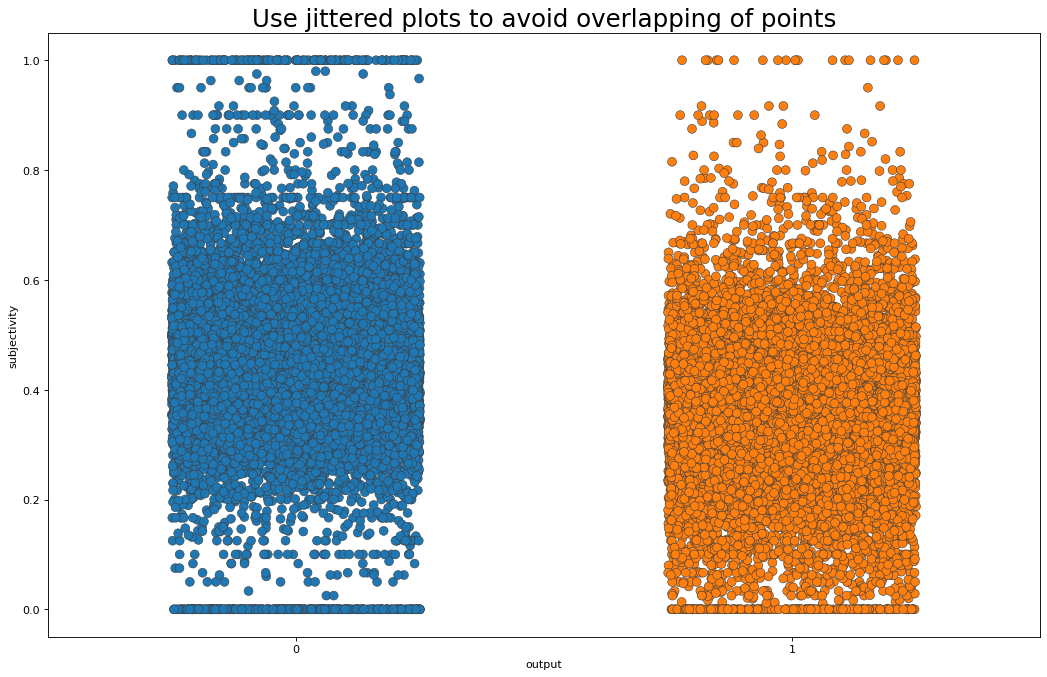

In [62]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(news_dataset['output'], news_dataset['subjectivity'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()